# Hotel Bookings Data Analysis Project

## 1. Introduction and Objectives

In this project, I will conduct an exploratory data analysis (EDA) on the `hotel_bookings.csv` dataset.

**The main objectives of this analysis are:**
* To clean and preprocess the raw data to make it ready for analysis.
* To uncover key trends and patterns in hotel booking behavior.
* To provide actionable insights and recommendations for the hotel business based on the findings.

In [90]:
# Import necessary libraries for analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.stats import chi2_contingency  # Removed as it wasn't used
sns.set_style('whitegrid')


## 2. Data Loading and Initial Exploration

I will start by loading the data and getting a first look at its structure and content.

In [92]:
# I loaded the CSV file into a DataFrame called 'df'.
try:
    df = pd.read_csv('hotel_bookings.csv')
    print("Data loaded successfully.")

except FileNotFoundError:
    print("Error: The file 'hotel_bookings.csv' was not found.")
    print("Please make sure the file is in the same directory as this notebook.")

Data loaded successfully.


In [93]:
# I displayed the first 5 rows to get a first look at the data.
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 3. Data Cleaning and Preprocessing

This is a critical step to ensure the quality and accuracy of the analysis. I will check for missing values, duplicates, and inconsistencies in the data.

In [95]:
# I checked for the number of missing values in each column.
print("Missing values before cleaning:")
df.isnull().sum()

Missing values before cleaning:


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Cleaning Plan

Based on the initial exploration, I decided on the following cleaning actions:
* **`company` column:** This column has over 94% missing values. It's not useful for my analysis, so I will drop it.
* **`agent` column:** This has some missing values. I will fill them with 0, assuming 0 means the booking was made without an agent.
* **`country` column:** A small number of rows have a missing country. I will fill these with the most frequent country (the mode).
* **`children` column:** Has only 4 missing values. I will fill these with 0.
* **Invalid Bookings:** I will remove any bookings that have 0 adults, 0 children, and 0 babies, as these are likely errors.
* **Duplicates:** I will check for and remove any duplicate rows.

In [97]:
# I implemented the cleaning plan.

# Dropping 'company' column.
df.drop('company', axis=1, inplace=True)

# Filling missing values for 'agent', 'children', and 'country'.
df['agent'] = df['agent'].fillna(0)
df['children'] = df['children'].fillna(0)
country_mode = df['country'].mode()[0]
df['country'] = df['country'].fillna(country_mode)

# Converting data types to integer.
df['children'] = df['children'].astype(int)
df['agent'] = df['agent'].astype(int)

# Removing invalid bookings.
df = df[~((df['adults']==0) & (df['children']==0) & (df['babies']==0))]

print("Missing values handled and data types corrected.")

Missing values handled and data types corrected.


In [98]:
# I checked for duplicate rows.
print(f"Number of duplicate rows found: {df.duplicated().sum()}")

# I removed the duplicate rows.
df.drop_duplicates(inplace=True)
print("Duplicate rows have been removed.")

Number of duplicate rows found: 32006
Duplicate rows have been removed.


In [99]:
# I checked the missing values again to confirm that the data is now clean.
print("\nMissing values after cleaning:")
df.isnull().sum()


Missing values after cleaning:


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

## 4. Exploratory Data Analysis (EDA)

Now that the data is clean, I can start with the analysis. I will ask some questions and use plots to find the answers.

### Question 1: Which hotel type is more popular?

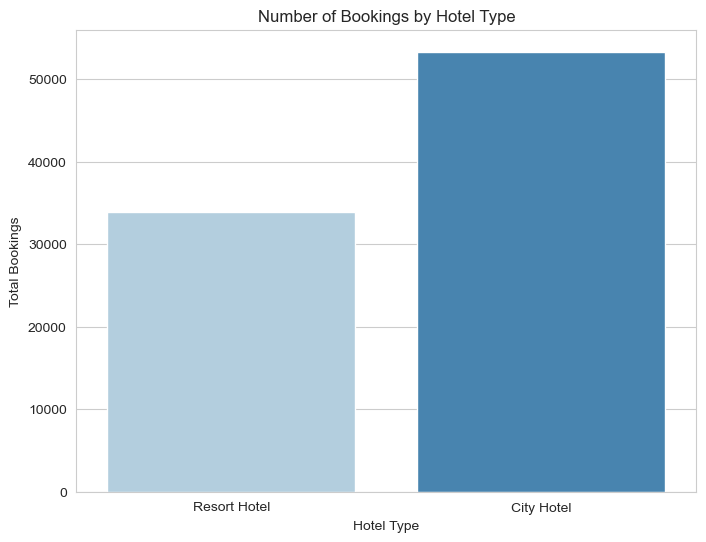

In [102]:
# I created a count plot to visualize the number of bookings for each hotel type.
plt.figure(figsize=(8, 6))
sns.countplot(x='hotel', data=df, palette='Blues', hue='hotel', legend=False)
plt.title('Number of Bookings by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Total Bookings')
plt.show()

**Insight:** The chart clearly shows that **City Hotels** receive significantly more bookings than Resort Hotels.

### Question 2: What are the busiest months for bookings?

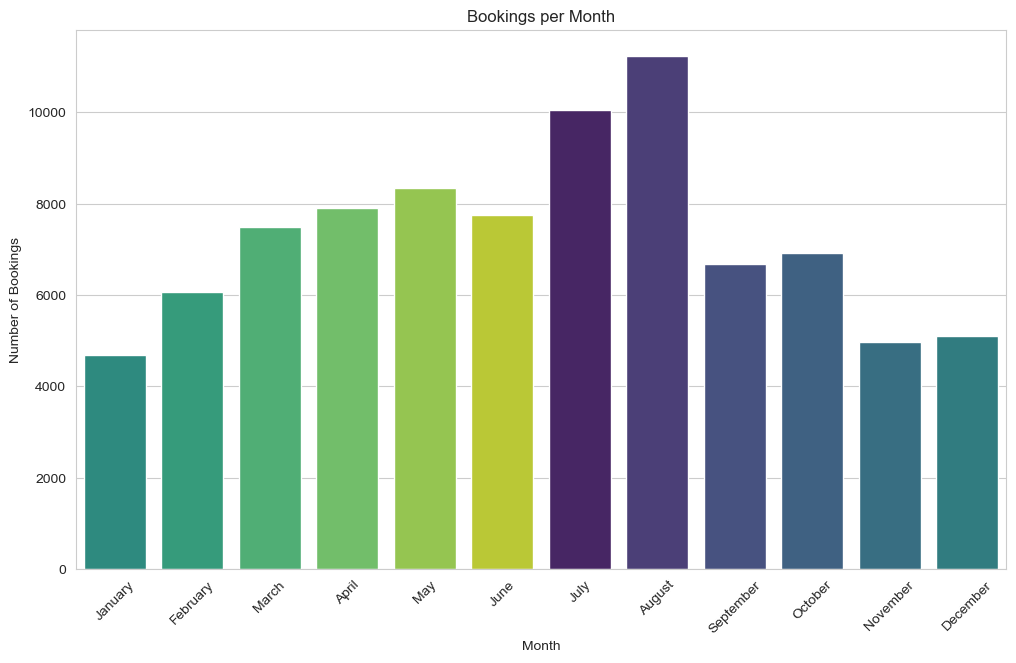

In [105]:
# To make the chart logical, I created a list to order the months chronologically.
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 7))
sns.countplot(x='arrival_date_month', data=df, order=month_order, palette='viridis', hue='arrival_date_month', legend=False)
plt.title('Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

**Insight:** The number of bookings peaks during the summer months, with **August** being the busiest month. This is likely due to summer holidays.

### Question 3: What is the percentage of canceled bookings?

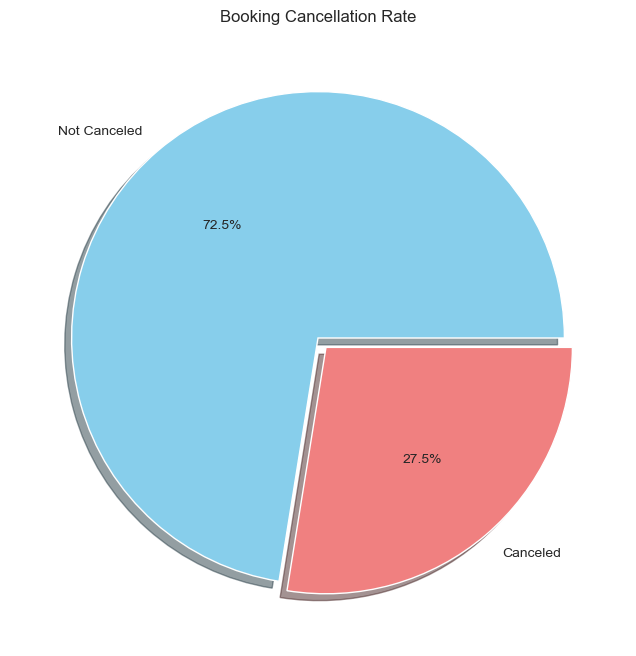

In [108]:
# I used a pie chart for this to easily show the percentage.
plt.figure(figsize=(8, 8))
df['is_canceled'].value_counts().plot.pie(explode=[0, 0.05], autopct='%1.1f%%', shadow=True,
                                          labels=['Not Canceled', 'Canceled'],
                                          colors=['skyblue', 'lightcoral'])
plt.title('Booking Cancellation Rate')
plt.ylabel('')
plt.show()

**Insight:** A substantial portion of bookings (**27.5%**) are canceled. This is a significant number that could impact hotel revenue.

### Question 4: Where do most of the guests come from? (Top 10 countries)

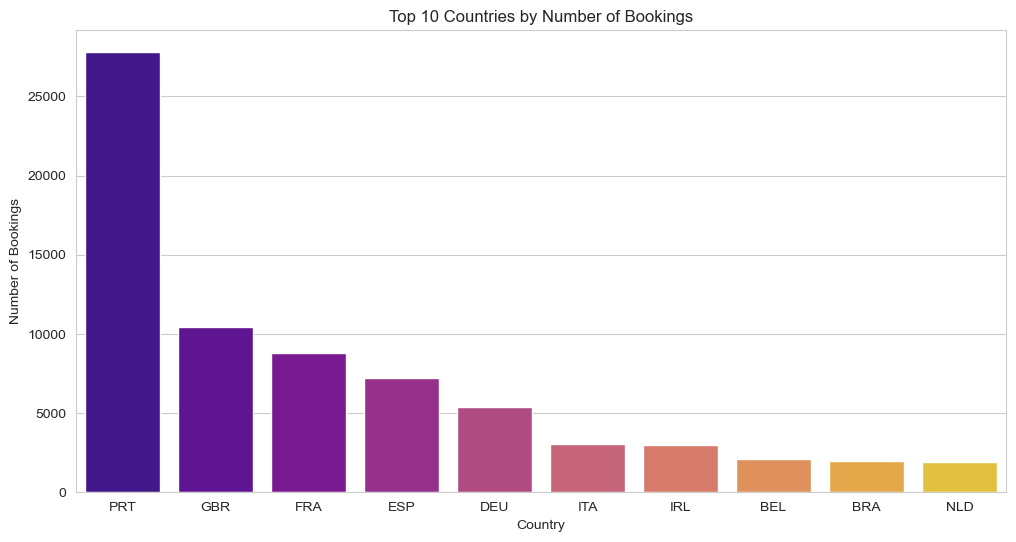

In [111]:
# I will count the number of guests from each country and then select the top 10.
top_10_countries = df['country'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='plasma', hue=top_10_countries.index, legend=False)
plt.title('Top 10 Countries by Number of Bookings')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.show()

**Insight:** The majority of guests come from a few key European countries, with **Portugal (PRT)** being the top source by a large margin.

### Question 5 (Statistical Analysis): Is there a significant relationship between hotel type and cancellation?

I noticed that many bookings are canceled. I want to test if the cancellation rate is related to the hotel type. I will use a Chi-Squared test for this, which is a statistical method to check for association between two categorical variables.

In [114]:
# I created a contingency table (crosstab) to see the counts of cancellations for each hotel type.
contingency_table = pd.crosstab(df['hotel'], df['is_canceled'])
print("Contingency Table:")
print(contingency_table)

# I performed the Chi-Squared test.
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f"\nChi-Squared Test p-value: {p_value}")

# I will interpret the result.
if p_value < 0.05:
    print("\nThe p-value is less than 0.05, which means there is a statistically significant association between hotel type and cancellation.")
else:
    print("\nThe p-value is greater than 0.05, so there is no statistically significant association.")

Contingency Table:
is_canceled       0      1
hotel                     
City Hotel    37237  16035
Resort Hotel  25959   7973

Chi-Squared Test p-value: 1.877585802903688e-100

The p-value is less than 0.05, which means there is a statistically significant association between hotel type and cancellation.


## 6. Final Conclusion and Recommendations

This final section summarizes the key findings from the analysis and provides actionable recommendations based on the data.

### Summary of Findings
* **Booking Volume:** City Hotels are more popular than Resort Hotels, receiving a larger volume of bookings.
* **Seasonality:** The busiest period for both hotel types is the summer, peaking in August. The lowest season is during the winter months.
* **Cancellation Rate:** Over a quarter of all bookings (27.5%) are canceled. The statistical test confirmed that there is a significant relationship between the hotel type and cancellation, suggesting that one hotel type suffers from a higher cancellation rate than the other.
* **Customer Origin:** The majority of guests come from Western Europe, particularly Portugal.

### Recommendations
1.  **Dynamic Pricing & Staffing:** Hotels should implement a dynamic pricing strategy that increases rates during the peak summer months (June-August) and offer promotions during the low season (November-January) to attract more guests. Staffing levels should also be adjusted accordingly.
2.  **Cancellation Policy Review:** The high cancellation rate needs to be addressed. Since the analysis shows a link between hotel type and cancellations (and further analysis could link it to lead time), hotels should consider a more flexible cancellation policy for certain booking types to reduce this rate. For example, offering a small discount for non-refundable bookings.
3.  **Targeted Marketing:** Marketing campaigns should be focused on the top European countries identified in the data. Additionally, creating loyalty programs could help increase the low rate of repeat guests.
